# TP2 Zero-Shot

Imports

In [13]:
import torch
import os
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation
from PIL import Image
from torchvision import transforms
import requests
import matplotlib.pyplot as plt
from io import BytesIO
import numpy as np

In [14]:
"a"*4

'aaaa'

In [15]:
model_name = "CIDAS/clipseg-rd64-refined"
processor = CLIPSegProcessor.from_pretrained(model_name)
model = CLIPSegForImageSegmentation.from_pretrained(model_name)

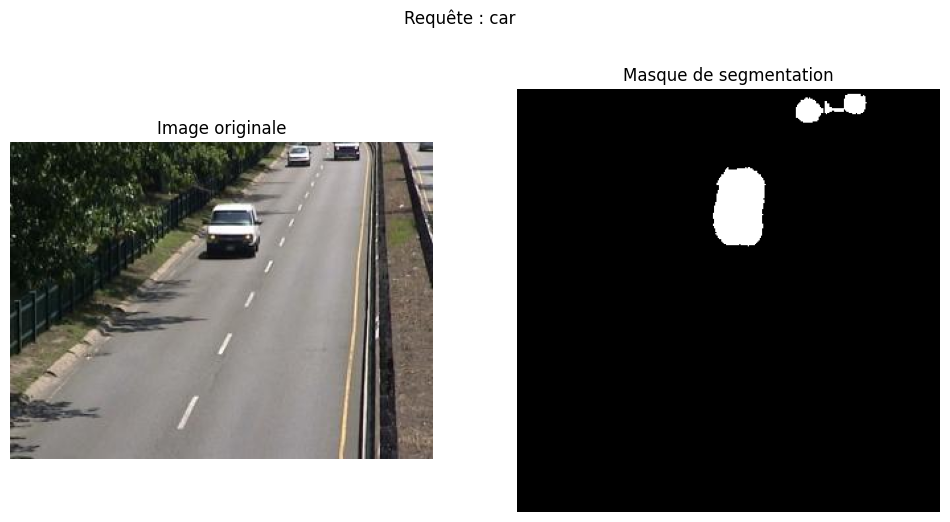

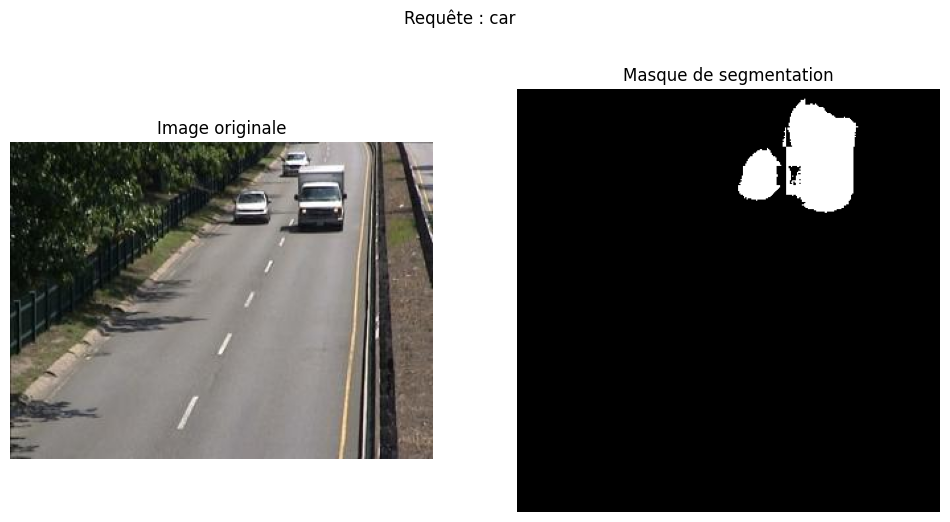

KeyboardInterrupt: 

In [17]:

# Définis le dossier contenant les images
image_dir = "baseline/baseline/highway/input"  # Remplace par le chemin réel de tes images

nombre_fichiers = len([f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))])

# Liste d'exemples avec le chemin des images
examples = []
    
for i in range( nombre_fichiers) : 
    examples.append({"path" : "in"+str(0)*(5-int(np.log10(i+1)))+str(i+1)+".jpg","prompt" : "car"})

# Boucle sur chaque exemple
c = 0
for example in examples:
    image_path = os.path.join(image_dir, example["path"])  # Construire le chemin absolu

    # Vérifier si l'image existe
    if not os.path.exists(image_path):
        print(f"Image non trouvée : {image_path}")
        continue

    # Charger l'image et la convertir en RGB
    image = Image.open(image_path).convert("RGB")

    # Prétraitement de l'image et du texte
    inputs = processor(text=example["prompt"], images=image, return_tensors="pt")

    # Inférence (mode évaluation)
    with torch.no_grad():
        outputs = model(**inputs)

    # Extraire le masque de segmentation
    pred_mask = outputs.logits.sigmoid().detach().cpu().numpy()[0]
    mask_binary = pred_mask > 0.5  # Seuil binaire

    # Afficher l'image originale et le masque
    c+=1
    if c%100==0 :
        plt.figure(figsize=(12, 6))
        plt.suptitle(f"Requête : {example['prompt']}")

        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title("Image originale")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(mask_binary, cmap="gray")
        plt.title("Masque de segmentation")
        plt.axis("off")

        plt.show()